## Zero shot Classification
Classifying texts that has not been labeled. 

In [2]:
from transformers import pipeline


In [3]:
classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli')

response = classifier(
    "Keras is an open-source software library that provides a Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library.",
    candidate_labels = ['Technology', 'Sports', 'Politics'],
)

print(response)

Device set to use mps:0


{'sequence': 'Keras is an open-source software library that provides a Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library.', 'labels': ['Technology', 'Sports', 'Politics'], 'scores': [0.824874222278595, 0.10706323385238647, 0.06806260347366333]}


## Text Generation


In [4]:
generator = pipeline('text-generation', model='gpt2')
response = generator("In a distant future, Artificial Intelligence will ", num_return_sequences=2, max_new_tokens=50)
generated_text = response[1]['generated_text']
print(generated_text)

Device set to use mps:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In a distant future, Artificial Intelligence will  be able to create and understand people in the real world and learn from them.
This means we will be able to create the products and services that we need to survive. 
In the 20th Century Artificial Intelligence will be able to understand


## Translation

In [5]:
# translate to french using a translation model
translator = pipeline('translation_en_to_fr', model='google-t5/t5-base')

translation = translator(generated_text)[0]['translation_text']
print(translation)

Device set to use mps:0


Dans un avenir lointain, l’intelligence artificielle sera en mesure de créer et de comprendre des gens dans le monde réel et d’en tirer des leçons, ce qui signifie que nous pourrons créer les produits et les services dont nous avons besoin pour survivre. Au XXe siècle, l’intelligence artificielle sera en mesure de comprendre


## Mask Filling
Fill in blanks in a given text

In [6]:
from transformers import pipeline

unmasker = pipeline('fill-mask')
response = unmasker("In a distant future, <mask> will  be able to do everything it asks of us.", top_k=5)

print(response)

No model was supplied, defaulted to distilbert/distilroberta-base and revision fb53ab8 (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0


[{'score': 0.13321202993392944, 'token': 9187, 'token_str': ' humanity', 'sequence': 'In a distant future, humanity will  be able to do everything it asks of us.'}, {'score': 0.057977546006441116, 'token': 30515, 'token_str': ' mankind', 'sequence': 'In a distant future, mankind will  be able to do everything it asks of us.'}, {'score': 0.03252732381224632, 'token': 4687, 'token_str': ' AI', 'sequence': 'In a distant future, AI will  be able to do everything it asks of us.'}, {'score': 0.031193459406495094, 'token': 41050, 'token_str': ' humankind', 'sequence': 'In a distant future, humankind will  be able to do everything it asks of us.'}, {'score': 0.02901940606534481, 'token': 2313, 'token_str': ' society', 'sequence': 'In a distant future, society will  be able to do everything it asks of us.'}]


## Named entity recognition (NER)
find parts of an input text that corresponds to entities such as persons, locations or organizations

In [7]:
ner = pipeline('ner', grouped_entities=True)
response = ner("Hugging Face is a technology company based in New York and Paris. Its headquarters are in DUMBO, therefore very close to the Manhattan Bridge.")
print(response)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0
/opt/ana

[{'entity_group': 'ORG', 'score': 0.9863939, 'word': 'Hugging Face', 'start': 0, 'end': 12}, {'entity_group': 'LOC', 'score': 0.99869907, 'word': 'New York', 'start': 46, 'end': 54}, {'entity_group': 'LOC', 'score': 0.99840075, 'word': 'Paris', 'start': 59, 'end': 64}, {'entity_group': 'LOC', 'score': 0.95659065, 'word': 'DUMBO', 'start': 90, 'end': 95}, {'entity_group': 'LOC', 'score': 0.99030375, 'word': 'Manhattan Bridge', 'start': 125, 'end': 141}]


## Question answering
Answers question from a given context

In [8]:
qna = pipeline('question-answering')
response = qna(
    context="The University and the city are intrinsically linked. As a multi-site university spread across the historic city of Chester, the student experience is inherently connected to the city. In effect, the city is our campus, and Chester is the backdrop for where many of our students work, play and learn.",
    question = "Where is the university located?"
    )
print(response)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


{'score': 0.8097569346427917, 'start': 116, 'end': 123, 'answer': 'Chester'}


## Summarization

In [9]:
summarizer = pipeline('summarization')
response = summarizer(
    "The University and the city are intrinsically linked. As a multi-site university spread across the historic city of Chester, the student experience is inherently connected to the city. In effect, the city is our campus, and Chester is the backdrop for where many of our students work, play and learn."
)
response

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0
Your max_length is set to 142, but your input_length is only 61. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


[{'summary_text': ' Chester is the backdrop for where many of our students work, play and learn . Chester is a multi-site university spread across the historic city of Chester . The University and the city are intrinsically linked . In effect, the city is our campus, and Chester is where students live, play, learn and work .'}]

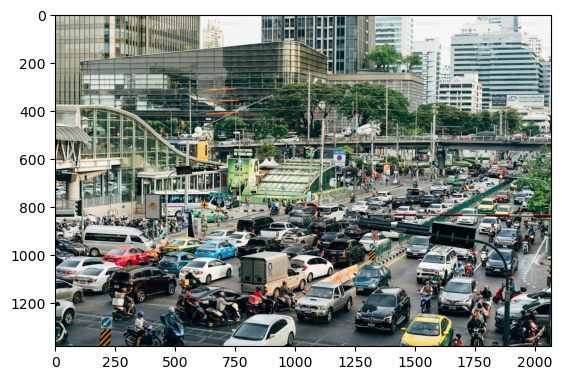

In [10]:
# Image Classification
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

img = Image.open('traffic.png')

plt.imshow(img)

# result

In [11]:
# show predictions
image_classifier = pipeline(task='image-classification', model='google/vit-base-patch16-224', use_fast=True)
result = image_classifier(img)
result

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use mps:0


[{'label': 'cab, hack, taxi, taxicab', 'score': 0.5531885623931885},
 {'label': 'minibus', 'score': 0.08645814657211304},
 {'label': 'trolleybus, trolley coach, trackless trolley',
  'score': 0.07650510221719742},
 {'label': 'traffic light, traffic signal, stoplight',
  'score': 0.045575100928545},
 {'label': 'streetcar, tram, tramcar, trolley, trolley car',
  'score': 0.042874500155448914}]

## Automatic Speech recognition

In [12]:
transcriber = pipeline(
    task='automatic-speech-recognition', model='openai/whisper-large-v3'
)

result = transcriber(
    "harvard.wav"
)
print(result)

Device set to use mps:0
`return_token_timestamps` is deprecated for WhisperFeatureExtractor and will be removed in Transformers v5. Use `return_attention_mask` instead, as the number of frames can be inferred from it.
Using custom `forced_decoder_ids` from the (generation) config. This is deprecated in favor of the `task` and `language` flags/config options.
Transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English. This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`. See https://github.com/huggingface/transformers/pull/28687 for more details.


{'text': ' The stale!'}


## Sentiment analysis

In [14]:
sentiment = pipeline('sentiment-analysis', model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")
sentiment(['I love using transformers library!', 'We are very happy to show you the 🤗 Transformers library.'])

Device set to use mps:0


[{'label': 'POSITIVE', 'score': 0.9989345669746399},
 {'label': 'POSITIVE', 'score': 0.9997795224189758}]

## Text Classification

In [15]:
text_class = pipeline('text-classification', model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)

text_class('The long lines and poor customer service really turned me off')

Device set to use mps:0
/opt/anaconda3/envs/ml/lib/python3.12/site-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


[[{'label': 'sadness', 'score': 0.10836900770664215},
  {'label': 'joy', 'score': 0.0023739368189126253},
  {'label': 'love', 'score': 0.0006029440555721521},
  {'label': 'anger', 'score': 0.8861263394355774},
  {'label': 'fear', 'score': 0.0019340661820024252},
  {'label': 'surprise', 'score': 0.0005936262896284461}]]

## Machine translation from FR to EN

In [20]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

en_fr_translator = pipeline('translation_en_to_fr', model='google-t5/t5-base')

en_fr_text = translator("I love you")[0]['translation_text']

print(en_fr_text)

tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-fr-en")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-fr-en")

tokenized_text = tokenizer([en_fr_text], return_tensors='pt')

translation = model.generate(**tokenized_text)
translated_text = tokenizer.batch_decode(translation, skip_special_tokens=True)[0]

translated_text

Device set to use mps:0


Je vous aime


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

'I love you.'